### Contents

* Logistic regression
* Support Vector Machine
* Bagging (Random Forest)
* Boosting (XGBoost)
* Neural Network (tensorflow/keras)



### Importing packages and data

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data from kaggle
df = pd.read_csv("./dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data processing and undersampling

In [3]:
df = df.drop("Time", axis=1)

In [67]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475


We need to standardize the 'Amount' feature before modelling. 
For that, we use the StandardScaler function from sklearn. Then, we just have to drop the old feature :

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [5]:
#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

Now, let's have a look at the class :

<Axes: xlabel='Class', ylabel='count'>

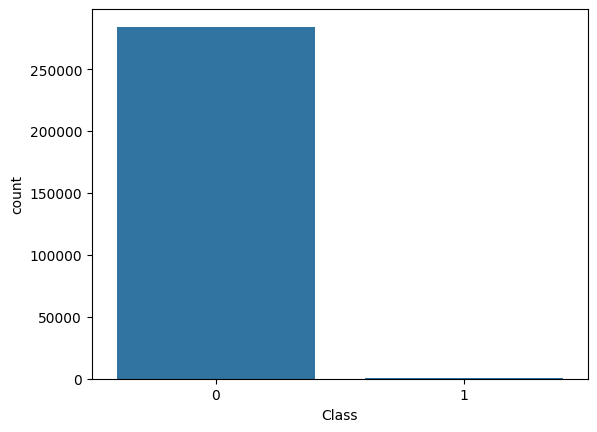

In [6]:
sns.countplot(x="Class", data=df)

The dataset is highly imbalanced ! 
It's a big problem because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To change that, I will proceed to random undersampling.  

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.

Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted.

### <center>How undersampling works :</center>
<center><img src= "https://miro.medium.com/max/335/1*YH_vPYQEDIW0JoUYMeLz_A.png">



To undersample, we can use the package imblearn with RandomUnderSampler function !

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [8]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [9]:
#define X and Y
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [10]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

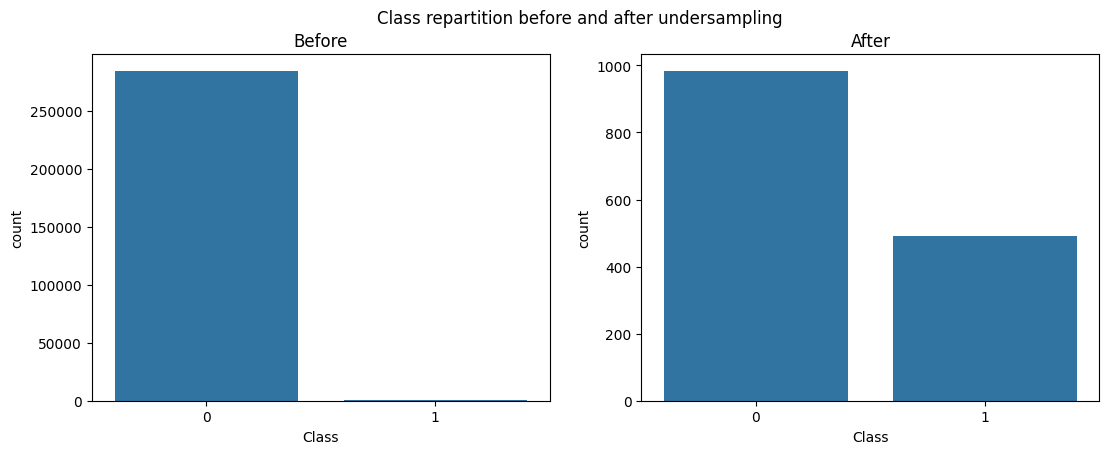

In [11]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [14]:
#importing packages for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

# 1. Logistic Regression

In [15]:
#train the model
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train, y_train)

In [16]:
#predictions
y_pred_logit = model1.predict(X_test) 

In [17]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

Accuracy Logit: 0.956081081081081
Precision Logit: 0.9797979797979798
Recall Logit: 0.8981481481481481
F1 Score Logit: 0.9371980676328503


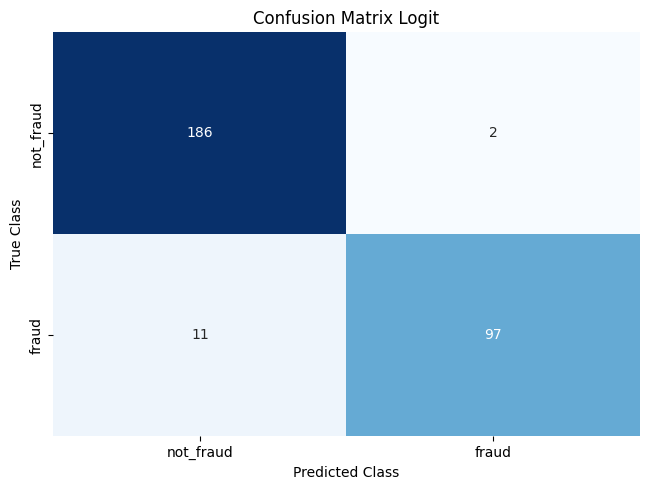

In [18]:
#print CM
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [19]:
#AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9731579984239559


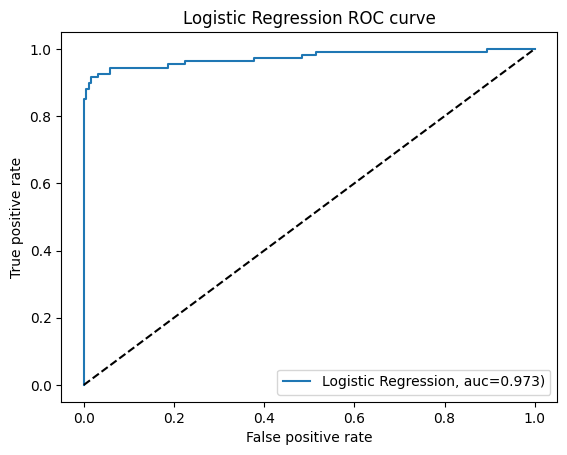

In [20]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

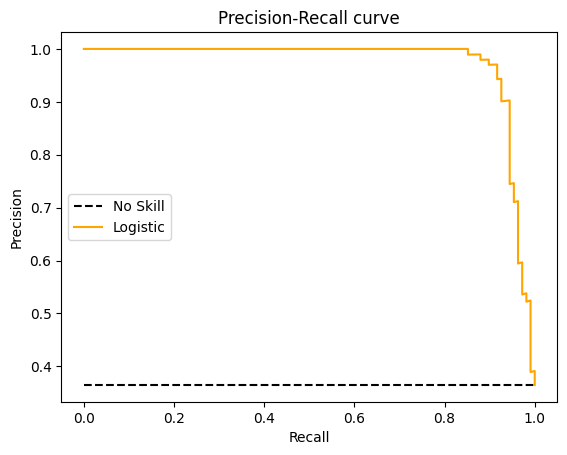

In [21]:
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Classification metrics for Logistic Regression (rounded down) :
- Accuracy : 0.95
- F1 score : 0.93
- AUC : 0.97

# 2. Support Vector Machine

In [22]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [23]:
#predictions
y_pred_svm = model2.predict(X_test)

In [24]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9391891891891891
Precision SVM: 0.96875
Recall SVM: 0.8611111111111112
F1 Score SVM: 0.9117647058823529


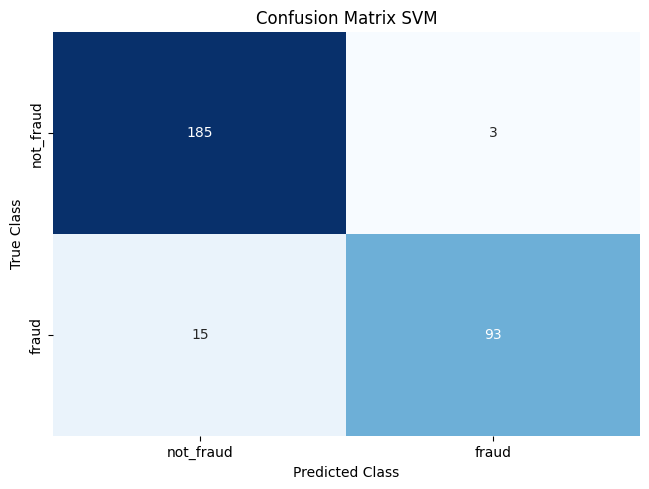

In [25]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9765070921985816


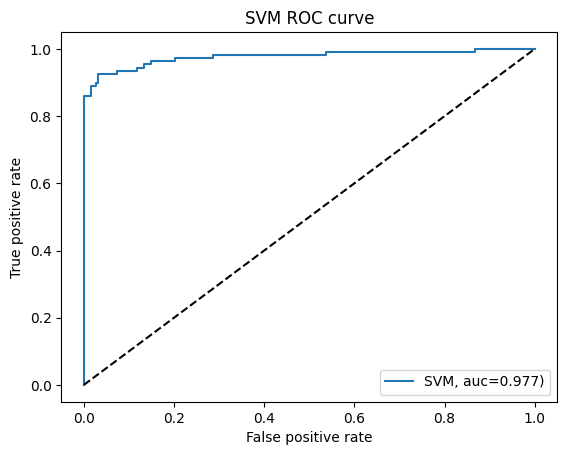

In [27]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

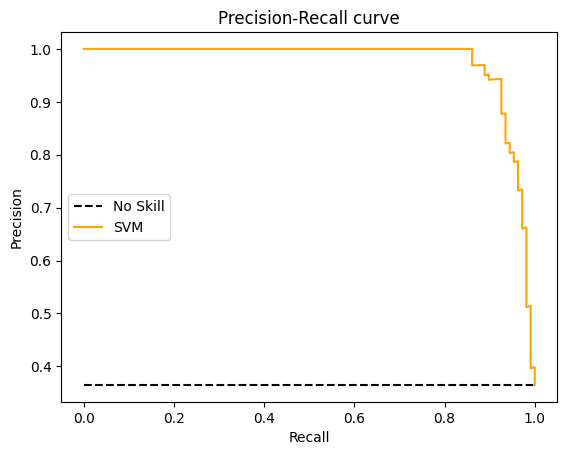

In [28]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Classification metrics for SVM (rounded down) :
- Accuracy : 0.93
- F1 score : 0.91
- AUC : 0.97

# 3. Ensemble learning : Bagging (Random Forest)

In [29]:
#train the model
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [30]:
#predictions
y_pred_rf = model3.predict(X_test)

In [31]:
#scores
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9493243243243243
Precision RF: 0.979381443298969
Recall RF: 0.8796296296296297
F1 Score RF: 0.926829268292683


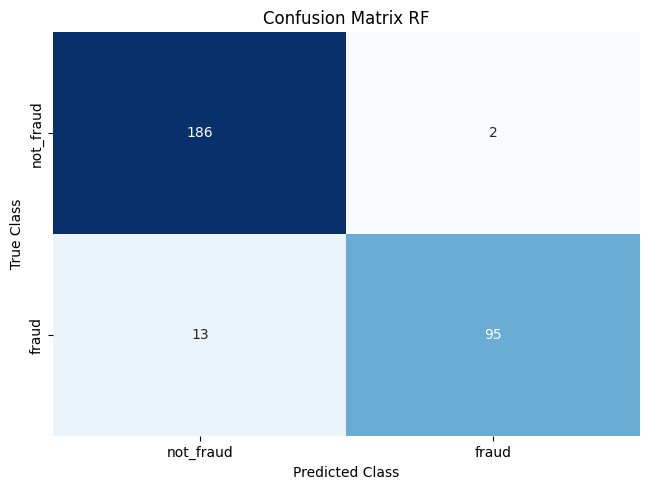

In [32]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [33]:
#AUC
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9686761229314421


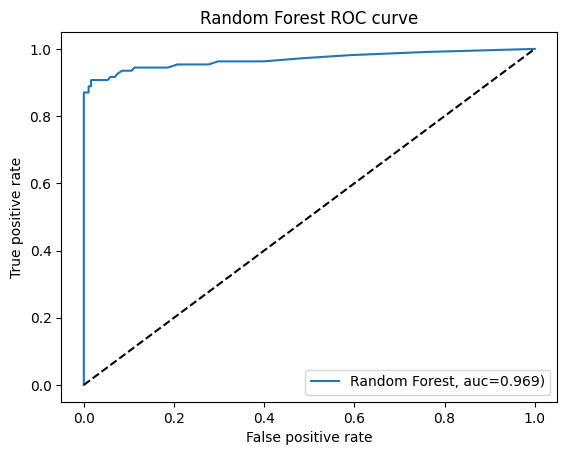

In [34]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

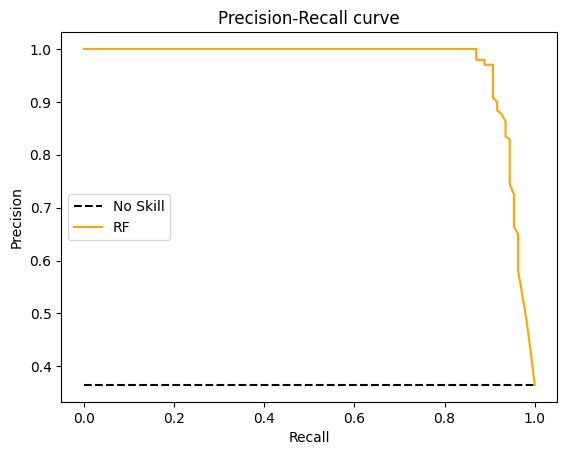

In [35]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Classification metrics for Random Forest (rounded down) :
- Accuracy : 0.94
- F1 score : 0.92
- AUC : 0.96

# 4. Ensemble learning : Boosting (XGBoost)

In [36]:
#train the model
model4 = XGBClassifier(random_state=2)
xgb = model4.fit(X_train, y_train)

In [37]:
#predictions
y_pred_xgb = model4.predict(X_test) 

In [38]:
#scores
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

Accuracy XGB: 0.9594594594594594
Precision XGB: 0.98
Recall XGB: 0.9074074074074074
F1 Score XGB: 0.9423076923076923


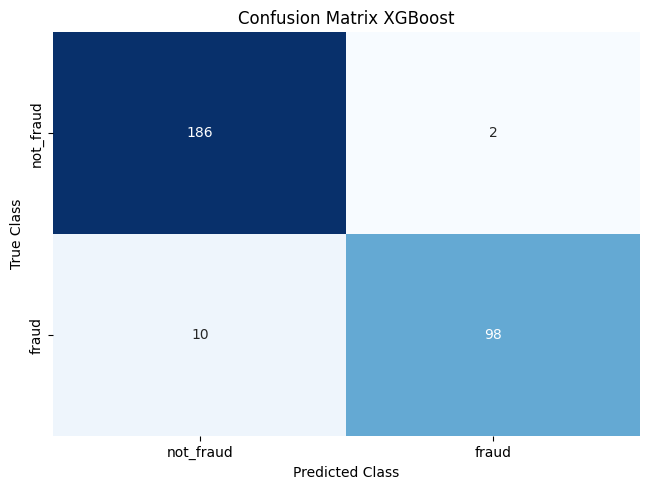

In [39]:
#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [40]:
#AUC
y_pred_xgb_proba = model4.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9718282111899134


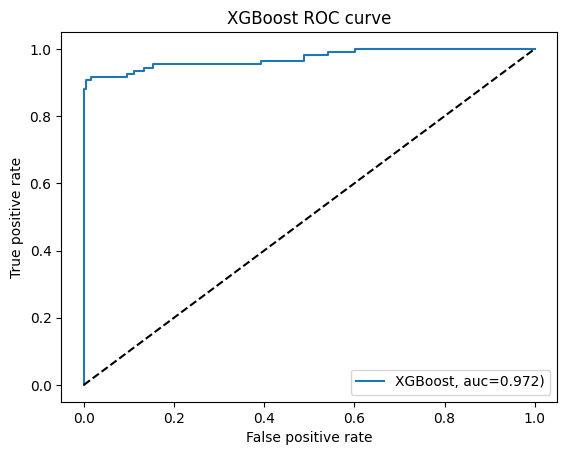

In [41]:
#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

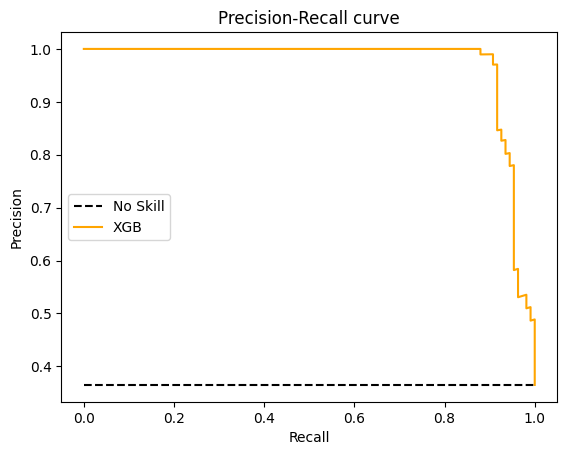

In [42]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Classification metrics for XGBoost (rounded down) :
- Accuracy : 0.95
- F1 score : 0.94
- AUC : 0.97

# 5. Multi Layer Perceptron

In [43]:
#train the model
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model5.fit(X_train, y_train)

In [44]:
model5.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [45]:
#predictions
y_pred_mlp = model5.predict(X_test)

In [46]:
#scores
print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(y_test, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(y_test, y_pred_mlp))

Accuracy MLP: 0.9290540540540541
Precision MLP: 0.9065420560747663
Recall MLP: 0.8981481481481481
F1 Score MLP: 0.9023255813953488


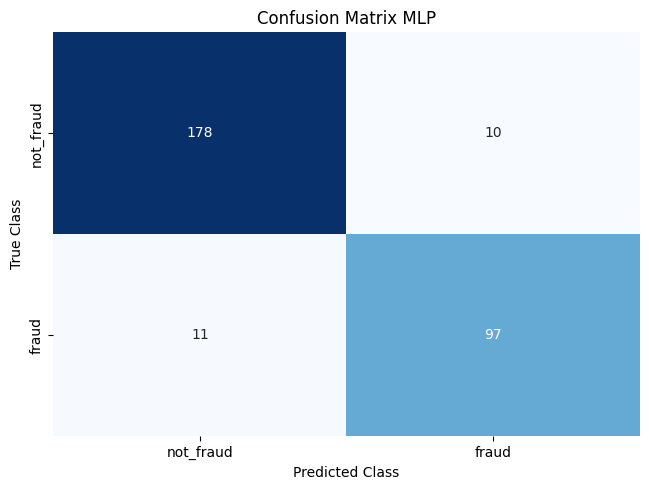

In [47]:
#CM matrix
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [48]:
#AUC
y_pred_mlp_proba = model5.predict_proba(X_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9780092592592593


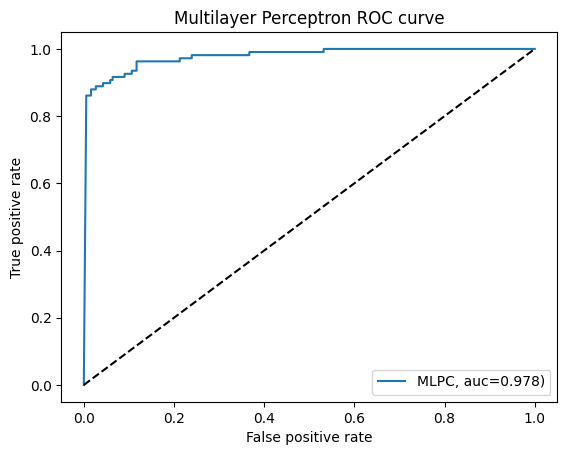

In [49]:
#ROC
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

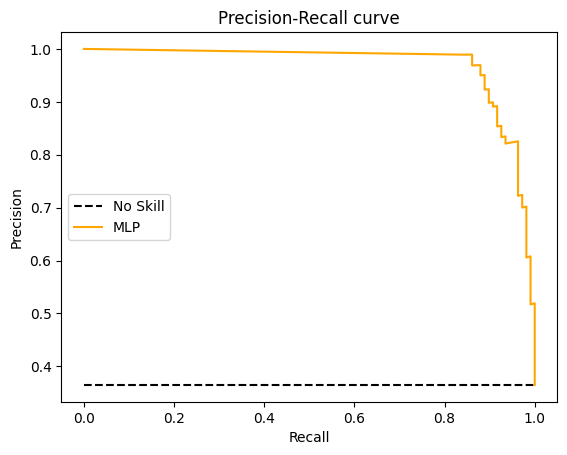

In [50]:
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_mlp_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(mlp_recall, mlp_precision, color='orange', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Classification metrics for Multi Layer Perceptron (rounded down) :
- Accuracy : 0.92
- F1 score : 0.90
- AUC : 0.97

# 6. Multilayer Neural Network with Tensorflow/Keras

In [51]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

In [53]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)

In [54]:
history = model.fit(X_train.values, y_train.values, epochs = 6, batch_size=5, validation_split = 0.15, verbose = 0,
                    callbacks = [earlystopper])
history_dict = history.history

Text(0.5, 0, 'Epochs')

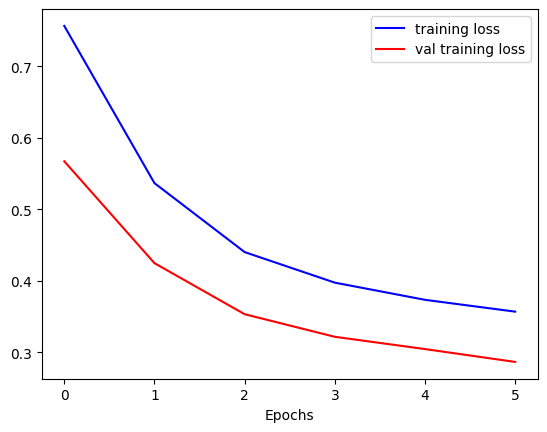

In [55]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

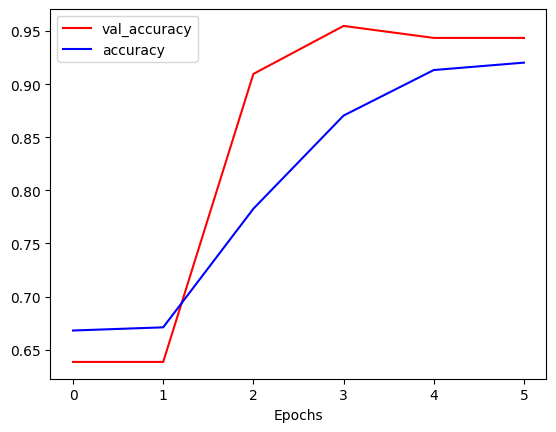

In [56]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [58]:
#predictions
y_pred_nn = np.argmax(model.predict(X_test), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [59]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.6351351351351351
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


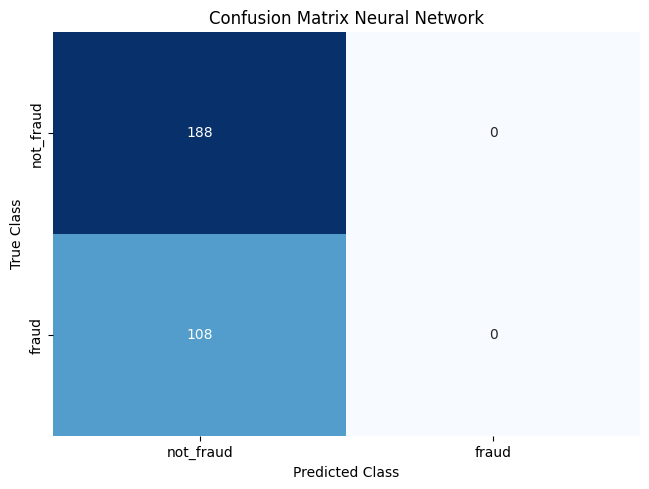

In [60]:
#CM matrix
matrix_nn = confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [62]:
#AUC
y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
AUC Neural Net:  0.9729609929078014


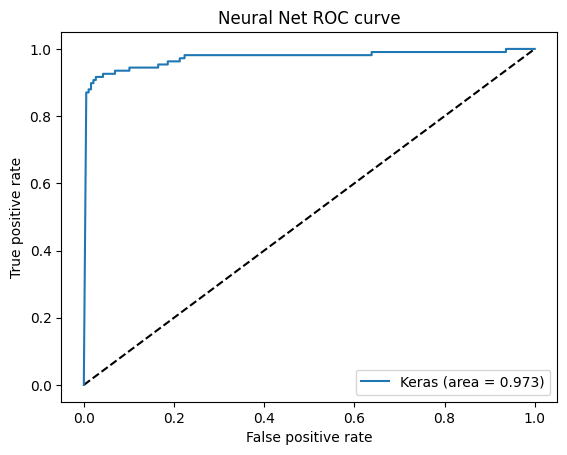

In [63]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

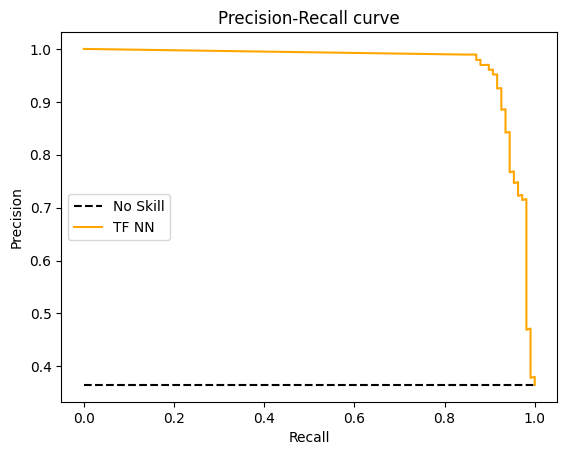

In [64]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Classification metrics for Neural Network (rounded down) :
- Accuracy : 0.63
- F1 score : 0.0
- AUC : 0.97

In [65]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression


# Define hyperparameter grid
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs"],  # Optimization algorithm
    "penalty": ["l1", "l2"]  # Type of regularization
}

# Initialize Logistic Regression model
logit_model = LogisticRegression(random_state=2)

# GridSearchCV for exhaustive tuning (slower but precise)
grid_search = GridSearchCV(logit_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_logit = grid_search.best_estimator_

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
y_pred_best = best_logit.predict(X_test)
print("Best Model Accuracy:", metrics.accuracy_score(y_test, y_pred_best))
print("Best Model F1 Score:", metrics.f1_score(y_test, y_pred_best))


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Model Accuracy: 0.956081081081081
Best Model F1 Score: 0.9371980676328503


In [66]:
# Save the trained model
import joblib

joblib.dump(best_logit, "best_logistic_regression.pkl")

['best_logistic_regression.pkl']